In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Single Variate Linear Regression

This example shows how to compute and plot the optimal solution for single variale linear regression via gradient descent. We will use a subset of the Boston Housing dataset to showcase the model.

*First, we will load the dataset.*

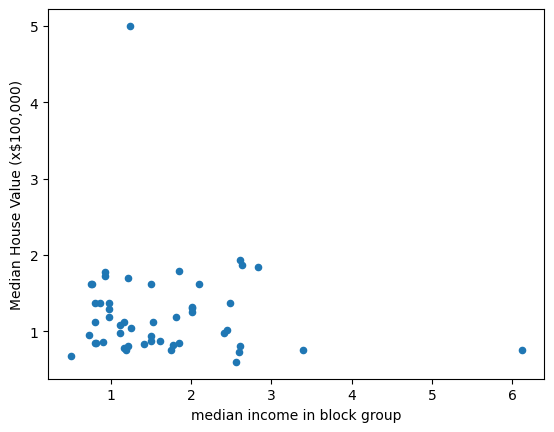

In [2]:
from sklearn.datasets import fetch_california_housing
hd = fetch_california_housing()
housing = pd.DataFrame(hd.data, columns=hd.feature_names)
housing['target'] = hd.target
housing.iloc[50:100,:].plot.scatter(x='MedInc', y='target')
plt.xlabel('median income in block group')
plt.ylabel('Median House Value (x$100,000)')
plt.show()
# housing

In [3]:
print(hd.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We're going to pick one of the variables, `MedInc`, and predict the response, `target`, from its values. To make things easier to visualize, we're only going to pick 50 samples from the dataset.

In [5]:
data = housing.loc[51:100,['MedInc', 'target']].to_numpy()
x = data[:,0]
y = data[:,1]
x, y, x.shape

(array([1.5045, 1.1108, 1.2475, 1.6098, 1.4113, 1.5057, 0.8172, 1.2171,
        2.5625, 3.3929, 6.1183, 0.9011, 1.191 , 2.5938, 1.1667, 0.8056,
        2.6094, 1.8516, 0.9802, 1.7719, 0.7286, 1.75  , 0.4999, 2.483 ,
        0.9241, 2.4464, 1.1111, 0.8026, 2.0114, 1.5   , 1.1667, 1.5208,
        0.8075, 1.8088, 2.4083, 0.977 , 0.76  , 0.9722, 1.2434, 2.0938,
        0.8668, 0.75  , 2.6354, 1.8477, 2.0096, 2.8345, 2.0062, 1.2185,
        2.6104, 2.4912]),
 array([0.938  , 0.975  , 1.042  , 0.875  , 0.831  , 0.875  , 0.853  ,
        0.803  , 0.6    , 0.757  , 0.75   , 0.861  , 0.761  , 0.735  ,
        0.784  , 0.844  , 0.813  , 0.85   , 1.292  , 0.825  , 0.952  ,
        0.75   , 0.675  , 1.375  , 1.775  , 1.021  , 1.083  , 1.125  ,
        1.313  , 1.625  , 1.125  , 1.125  , 1.375  , 1.188  , 0.982  ,
        1.188  , 1.625  , 1.375  , 5.00001, 1.625  , 1.375  , 1.625  ,
        1.875  , 1.792  , 1.3    , 1.838  , 1.25   , 1.7    , 1.931  ,
        2.578  ]),
 (50,))

Next, we will find the best model via Gradient Descent.

In [6]:
def gradient(t, X, y):
    """Compute the current error and gradient."""
    # Hypothesis/estimate values for y
    y_estimate = X.dot(t).flatten()
    # Loss - the difference between the estimated and actual values of y
    loss = y.flatten() - y_estimate
    m = float(len(X))
    # Compute gradient
    grad = -(1.0 / m) * loss.dot(X)
    # Cost function value
    cost = (0.5 / m) * np.sum(np.power(loss, 2))
    return grad, cost

def compute_cost(t, X, y):
    """Compute the current error/cost."""
    y_estimate = X.dot(t).flatten()
    loss = y.flatten() - y_estimate
    m = float(len(X))
    return (0.5 / m) * np.sum(np.power(loss, 2))

def gradient_descent(x, y, alpha=0.5, tolerance=1e-5, maxit=1e+6, nulbias=False):
    """Finds the best line fit for predicting y given x.
       Keep track of and also return tested models, gradients, and errors 
       along the optimization path.
    """
    # add intercept term to x -- acounts for the bias -- and normalize x's
    X = np.vstack((np.ones_like(x), x/x.max())).T
    # start with a random (or zeros) theta vector
    t = np.random.randn(2)
    if nulbias:
        t[0] = 0
    # perform gradient descent
    it = 0
    models = []
    grads = []
    errors = []
    while it < maxit:
        grad, error = gradient(t, X, y)
        models.append(t)
        grads.append(grad)
        errors.append(error)
        new_t = t - alpha * grad
        if nulbias:
            new_t[0] = 0
        # check whether we should stop
        if np.sum(abs(new_t - t)) < tolerance:
            break
        # update theta
        t = new_t
        it += 1
    if it == maxit:
        print("Warning: reached maximum number of iterations without convergence.")
    return X, t, models, grads, errors

def plotmodel(x, y, t, start_at_zero=False):
    """Plot the line of a given model."""
    if t is not None:
        if start_at_zero:
            x = np.append([0], x)
            y = np.append([0], y)
        plt.plot(x, t[0] + x/x.max() * t[1], c='g', label='Model')
#         equivalent to:
#         X = np.vstack((np.ones_like(x), x/x.max())).T
#         plt.plot(x, X.dot(t), c='g', label='Model')
    plt.scatter(x, y, c='b', label='Data')
    plt.legend(loc='best')
    plt.xlabel('MedInc')
    plt.ylabel('Median House Price (x$100,000)')
    if start_at_zero:
        plt.ylim(ymin=0)
        plt.xlim(xmin=0)
    plt.show()

Let's see what our data looks like by plotting the response ($y$) in terms of the predictor ($x$). We can choose any line in the plane to be a model for predicting the response.

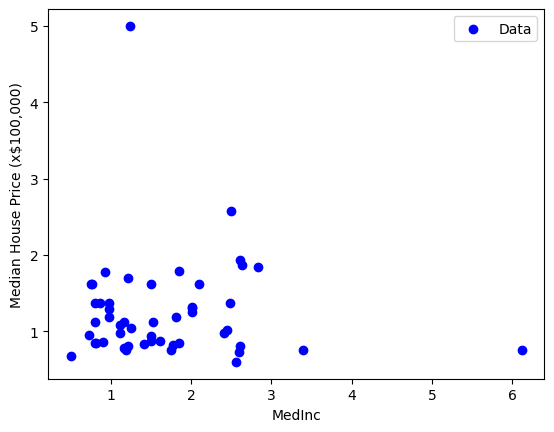

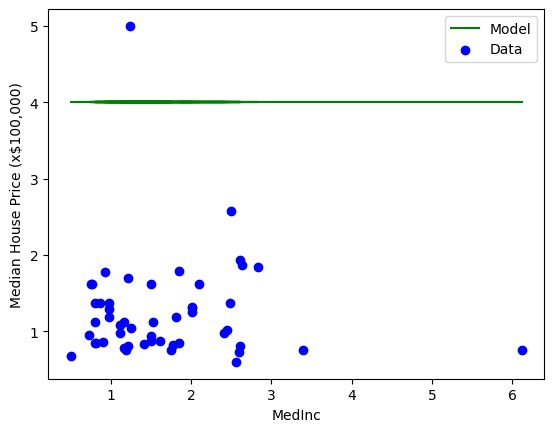

In [7]:
plotmodel(x, y, None)
plotmodel(x, y, np.array([4, 0]))

Initially, let's assume that we don't actually have a bias term. This will make visualizing the parameter space easier. We'll find the best model and plot a few models along the way, specifically, the initial random model and models after traversing each quarter of the search space.

# iterations:  190
first model:  [0.         0.70831548]
best model:  [0.         3.43439129]
Iteration:  1
Gradient:  [-1.05890591 -0.26797516]
Error:  0.79826004730694


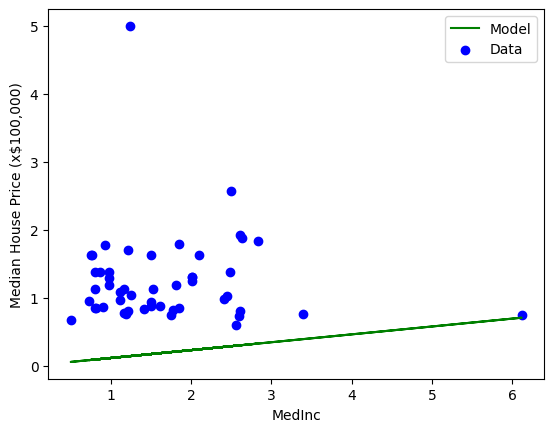

Iteration:  48
Gradient:  [-0.38317525 -0.02508584]
Error:  0.43617420107685256


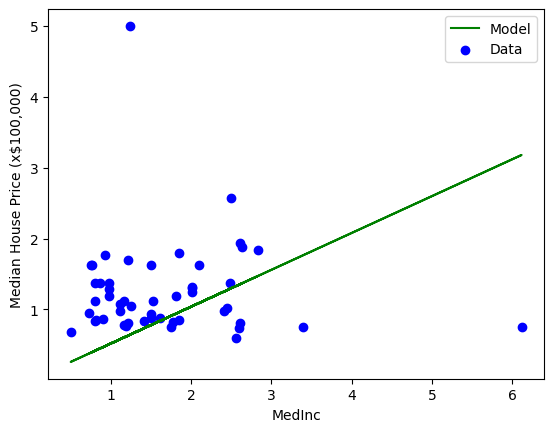

Iteration:  96
Gradient:  [-0.3195973  -0.00223294]
Error:  0.43299844134380017


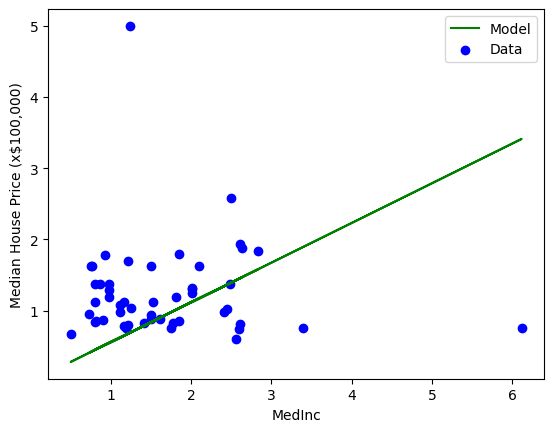

Iteration:  142
Gradient:  [-3.13996747e-01 -2.19834937e-04]
Error:  0.43297332436390656


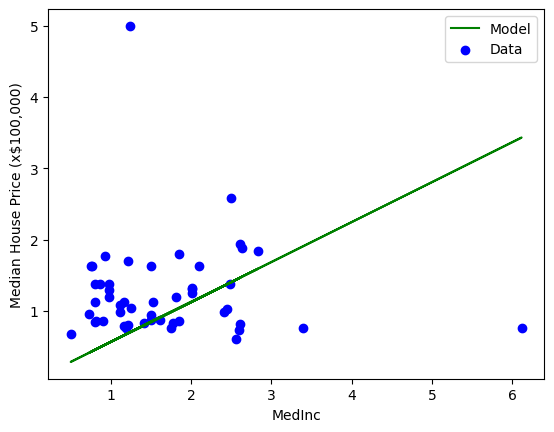

Iteration:  190
Gradient:  [-3.13439594e-01 -1.95679020e-05]
Error:  0.4329730804795866


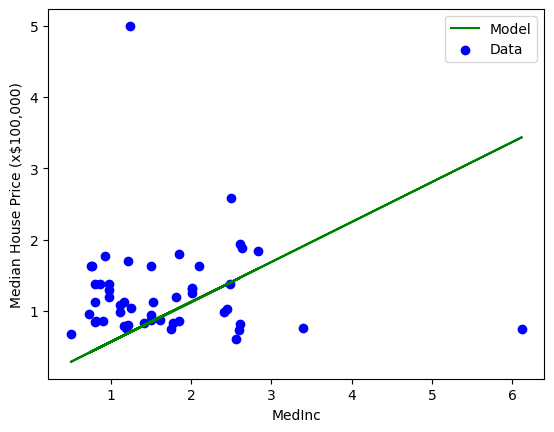

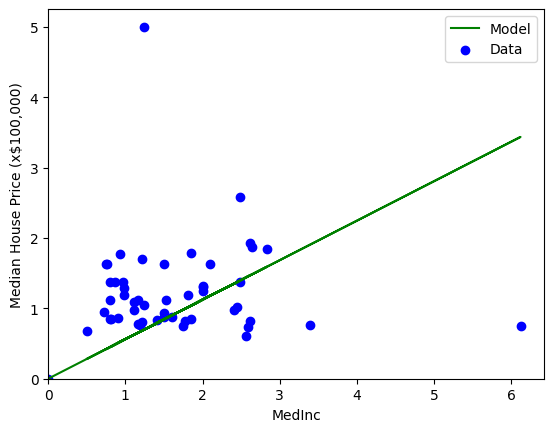

In [8]:
X, t, models, grads, errors = gradient_descent(x, y, nulbias=True)
print("# iterations: ", len(models))
print("first model: ", models[0])
print("best model: ", t)

nits = len(models)
ts = [0, nits//4, nits//2, 3*(nits//4), nits-1] # quartles
for i in ts:
    print("Iteration: ", i+1)
    print("Gradient: ", grads[i])
    print("Error: ", errors[i])
    plotmodel(x, y, models[i])
plotmodel(x, y, models[-1], True)

We can plot the cost function in terms of the $\theta$ value. Note that, as $\theta$ gets closer to the optimum value, the distance traveled decreases, even through the step size $\alpha$ remains constant. After 10 steps, the cost function was only 0.34 away from its optimum value.

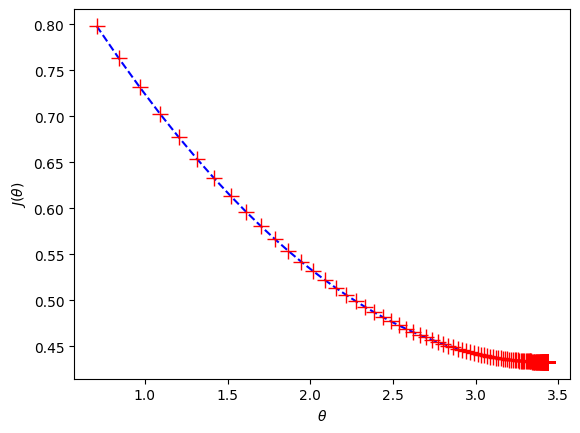

In [9]:
plt.plot([m[1] for m in models], errors, 'b+--', markersize=12, markeredgecolor='r')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.show()

If we also consider the bias term, the optimization takes slightly longer, but is able to fit the evidence much better.

# iterations:  657
first model:  [1.8361498  0.97431784]
best model:  [ 1.30979283 -0.20916216]
Iteration:  1
Gradient:  [0.84998428 0.26028038]
Error:  0.6054309295188637


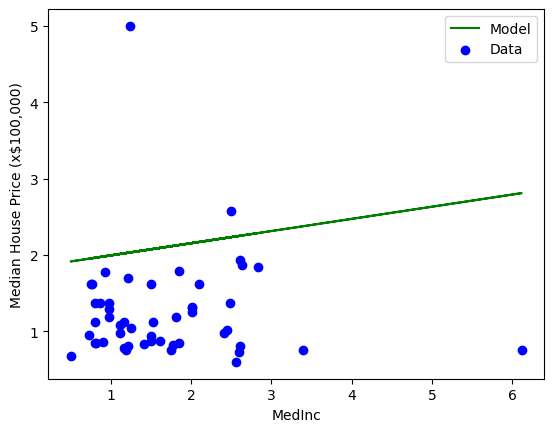

Iteration:  165
Gradient:  [-0.00096996  0.00346955]
Error:  0.22800401116896787


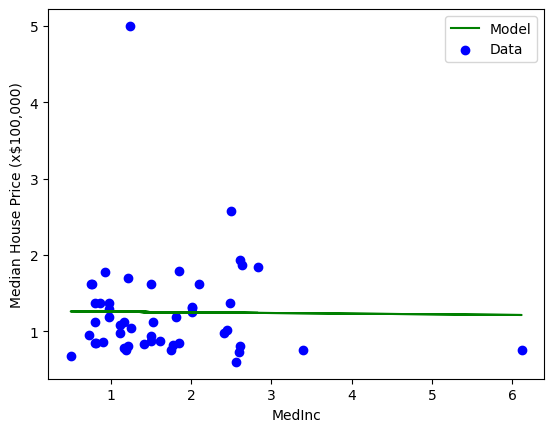

Iteration:  329
Gradient:  [-0.00016016  0.00057288]
Error:  0.22771504189926894


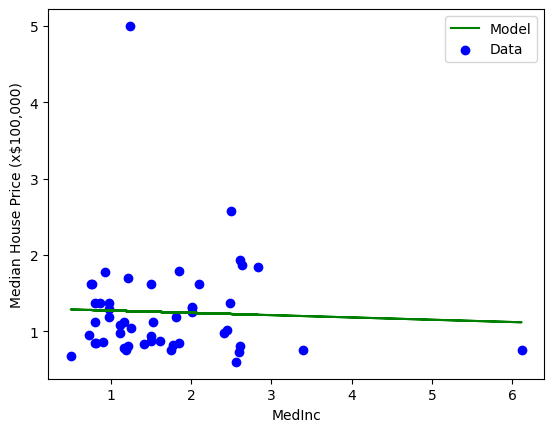

Iteration:  493
Gradient:  [-2.64448468e-05  9.45929761e-05]
Error:  0.22770716350568485


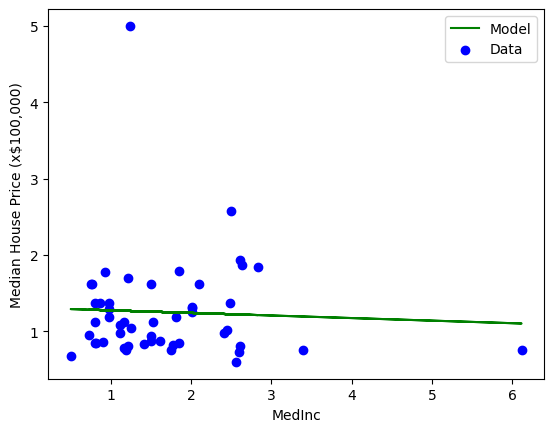

Iteration:  657
Gradient:  [-4.36650600e-06  1.56189522e-05]
Error:  0.227706948710923


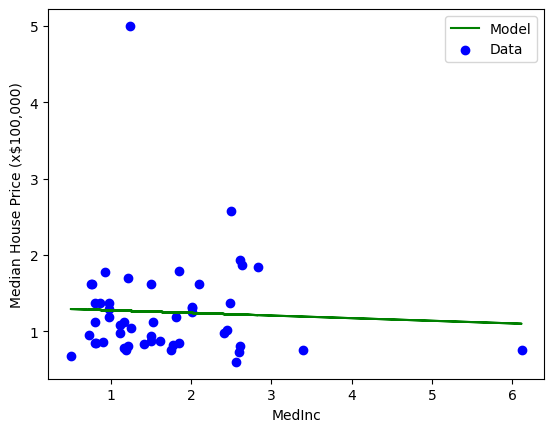

In [10]:
X, t, models, grads, errors = gradient_descent(x, y)
print("# iterations: ", len(models))
print("first model: ", models[0])
print("best model: ", t)

nits = len(models)
ts = [0, nits//4, nits//2, 3*(nits//4), nits-1] # quartles
for i in ts:
    print("Iteration: ", i+1)
    print("Gradient: ", grads[i])
    print("Error: ", errors[i])
    plotmodel(x, y, models[i])

Since $\theta$ is now a vector with two features, we will plot the cost function in 3D space in terms of the two possible values for $\theta$ and the cost function response $J(\theta)$.

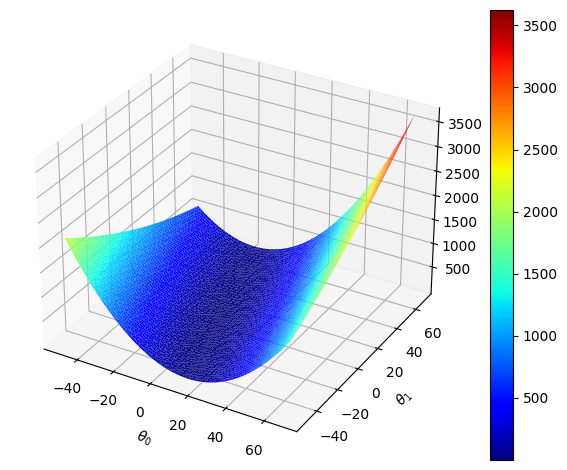

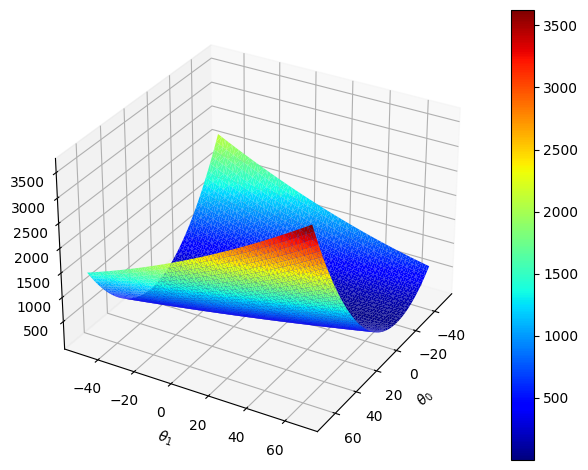

In [11]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plotcost(X, y, start=-100, end=100, step=2, rotate=False):
    """Construct a 3D plot of the cost function range."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    t0s = []
    t1s = []
    errors = []
    for t0 in np.arange(start, end, step):
        for t1 in np.arange(start, end, step):
            t0s.append(t0)
            t1s.append(t1)
            errors.append(compute_cost(np.array([t0, t1]), X, y))
    
    surf = ax.plot_trisurf(t0s, t1s, errors, cmap=cm.jet, linewidth=0.2)
    fig.colorbar(surf)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')

    if rotate:
        ax.view_init(30, 30)

    fig.tight_layout()
    plt.show()
    
plotcost(X, y, start=-50, end=70)
plotcost(X, y, start=-50, end=70, rotate=True)

## Task: Multi-Variate Linear Regression

Modify the gradient function given to you earlier to perform multivariate linear regression, i.e., the input contains more than one variable. Then, use the function you created to find the combination of any two dependent variables with the least root mean square error with regards to the response/target variable. You do not need to plot the cost function for this exercise.